## Data Cleaning

Running `amar.rmd` notebook will generate  Our Data is saved in `animation_data.csv`. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

### Loading Data

### Data Describtion
    
|Index| feature | datatype | Description | farsi |
|--| :-------| ------- | :------------| -------: |
|0 | URL                    | str | the complete url to the animation's page | URL - آدرس اینترنتی صفحه انیمیشن|
|1 | Name                   | str |  Name of the animation in farsi  |Name - نام انیمیشن|
|2 | IMDB_Link              | float | number in range [0,10] with one decimal position but farsi digits "۶.۷" "۷.۰" ... |IMDB_Link - امتیاز به صفحه IMDb انیمیشن|
|3 | Amtiaz                 | float | percentage rating from the website  | Amtiaz - امتیاز انیمیشن که توسط کاربران داده شده|
|4 | Number_People          | int | number in $[0, \infty]$ |Number_People - تعداد کاربرانی که به انیمیشن امتیاز داده‌اند|
|5 | Country                | str | Country of origin in farsi "آمریکا " not trimmed |Country - کشور سازنده انیمیشن|
|6 | Year                   | ordinal category | release year in Latin digits |Year - سال تولید انیمیشن|
|7 | Rade                   | ordinal category | "رده سنی ۳+" "رده سنی ۳+" "رده سنی ۳+" "رده سنی ۳+" ... |Rade - رده سنی انیمیشن|
|8 | Num_Seasons            | 2 level factor / category | Number of seasons, positive integer must be |Num_Seasons - تعداد فصل‌های انیمیشن (در صورت سریال بودن)|
|9 | Total_Episodes         | 2 level factor / category | Number of total Episodes, positive integer must be. some have zero?|Total_Episodes - تعداد کل قسمت‌ها (در صورت سریال بودن)|
|10| Publication            | 2 level factor / category | binary,| Publication - وجود بخش انتشار|
|11| VoiceActors            | 2 level factor / category | binary 1 if section exists |VoiceActors - وجود بخش صداپیشگان|
|12| Review                 | 2 level factor / category | binary 1 if section exists |Review - وجود بخش نقد و بررسی|
|13| Tips                   | 2 level factor / category | binary 1 if section exists |Tips - وجود بخش نکات|
|14| End                    | 2 level factor / category | binary 1 if section exists |End - وجود بخش پایانی|
|15| Description            | 2 level factor / category | binary 1 if section exists |Description - وجود بخش توضیحات|
|16| Characters             | 2 level factor / category | binary 1 if section exists |Characters - وجود بخش شخصیت‌ها|
|17| InformativeMessages    | 2 level factor / category | binary 1 if section exists |InformativeMessages - وجود بخش پیام‌های آموزنده|
|18| PositiveAndNegative    | 2 level factor / category | binary 1 if section exists |PositiveAndNegative - وجود بخش نکات مثبت و منفی|
|19| SummaryStory           | 2 level factor / category | binary 1 if section exists |SummaryStory - وجود بخش خلاصه داستان|
|20| Screening              | 2 level factor / category | binary 1 if section exists |Screening - وجود بخش اکران|
|21| Critics                | 2 level factor / category | binary 1 if section exists |Critics - وجود بخش نظر منتقدان|
|22| Conclusion             | 2 level factor / category | binary 1 if section exists |Conclusion - وجود بخش نتیجه‌گیری|
|23| Introduction           | 2 level factor / category | binary 1 if section exists |Introduction - وجود بخش معرفی|
|24| Total_Words            | int | 57 41 1411 1192 73 1329 92 109 1354 74 ...|Total_Words - تعداد کل کلمات در توضیحات|
|25| Num_Titles             | int | 2 2 8 8 2 7 2 2 7 2 ...|Num_Titles - تعداد عناوین توضیحات|
|26| Is_Doblele             | 2 level factor / category | binary 1 if it is dubbed |Is_Doblele - آیا عنوان دوبله دارد یا خیر|
|27| Total_Target_Words     | int | count number of target words |Total_Target_Words - تعداد تکرار کلمات خاص در توضیحات|
|28| About_Words            | int | count number of final words |About_Words - تعداد کلمات در بخش "درباره انیمیشن "|
|29| Story_Words            | int | count number of Informative words |Story_Words - تعداد کلمات در بخش "داستان انیمیشن"|
|30| Release_Date_Words     | int | count number of words in this section |Release_Date_Words - تعداد کلمات در بخش "تاریخ انتشار"|
|31| Review_Words           | int | count number of words in this section |Review_Words - تعداد کلمات در بخش "بررسی انیمیشن "|
|32| Final_Words            | int | count number of words in this section |Final_Words - تعداد کلمات در بخش سخن پایانی|
|33| Informative_Words      | int | count number of words in this section |Informative_Words - تعداد کلمات در بخش پیام‌های آموزنده|
|34| Positive_Negative_Words| int | count number of words in this section |Positive_Negative_Words - تعداد کلمات در بخش نکات مثبت و منفی|
|35| Summary_Words          | int | count of words |Summary_Words - تعداد کلمات در بخش خلاصه داستان|
|36| Screening_Words        | int | count of words |Screening_Words - تعداد کلمات در بخش زمان اکران|
|37| Critics_Words          | int | count of words |Critics_Words - تعداد کلمات در بخش نظر منتقدان|
|38| Conclusion_Words       | int | count of words |Conclusion_Words - تعداد کلمات در بخش نتیجه‌گیری|
|39| Introduction_Words     | int | count of words |Introduction_Words - تعداد کلمات در بخش معرفی انیمیشن |
|40| Voice_Actor_Words      | int | count of words |Voice_Actor_Words - تعداد کلمات در بخش صداپیشگان|
|41| Series                 | 2 level factor / category | binary 1 if tag exists |Series - وجود تگ سریال|
|42| Animation              | 2 level factor / category | binary 1 if tag exists |Animation - وجود تگ انیمیشن|
|43| Western                | 2 level factor / category | binary 1 if tag exists |Western - وجود تگ وسترن|
|44| Adventure              | 2 level factor / category | binary 1 if tag exists |Adventure - وجود تگ ماجراجویی|
|45| Comedy                 | 2 level factor / category | binary 1 if tag exists |Comedy - وجود تگ کمدی|
|46| Family                 | 2 level factor / category | binary 1 if tag exists |Family - وجود تگ خانوادگی|
|47| Fantasy                | 2 level factor / category | binary 1 if tag exists |Fantasy - وجود تگ فانتزی|
|48| Mystery                | 2 level factor / category | binary 1 if tag exists |Mystery - وجود تگ معمایی|
|49| Action                 | 2 level factor / category | binary 1 if tag exists |Action - وجود تگ اکشن|
|50| Romance                | 2 level factor / category | binary 1 if tag exists |Romance - وجود تگ عاشقانه|
|51| Drama                  | 2 level factor / category | binary 1 if tag exists |Drama - وجود تگ درام|
|52| SciFi                  | 2 level factor / category | binary 1 if tag exists |SciFi - وجود تگ علمی‌تخیلی|
|53| ShortFilm              | 2 level factor / category | binary 1 if tag exists |ShortFilm - وجود تگ فیلم کوتاه|
|54| Crime                  | 2 level factor / category | binary 1 if tag exists |Crime - وجود تگ جنایی|
|55| Musical                | 2 level factor / category | binary 1 if tag exists |Musical - وجود تگ موزیکال|
|56| Korean                 | 2 level factor / category | binary 1 if tag exists |Korean - وجود تگ کره‌ای|
|57| Thriller               | 2 level factor / category | binary 1 if tag exists |Thriller - وجود تگ هیجان‌انگیز|
|58| Anime                  | 2 level factor / category | binary 1 if tag exists |Anime - وجود تگ انیمه|
|59| Music                  | 2 level factor / category | binary 1 if tag exists | Music - وجود تگ موسیقی|


In [2]:
df = pd.read_csv('animation_movie_features.csv')

### Examinig Numerical Data

- Amtiaz
- range IMDB

In [3]:
df.IMDB_Link = df.IMDB_Link.astype('float64')
the_strange_char = df.Number_People[1][1]
print('farsi decimal point char to be replaced :', the_strange_char)
df.Number_People = df.Number_People.str.replace(the_strange_char,'.').astype('float64')*1000
df.Number_People = df.Number_People.astype('int64')

farsi decimal point char to be replaced : ,


### Validating Categorical Data

- Country, Rade can be converted to categorical, Year can be numerical
- binary values must be only 0 and 1

In [4]:
print('Country values :', df.Country.unique()) ## str can be stripped and there are missing values
print('Year values :', df.Year.unique()) # one value with farsi digits 
print('Rade values :', df.Rade.unique())

cols = df.columns
ind = list(range(10,24))
ind.append(26)
ind.extend(list(range(42, 60))) # indexes of all binary values
for i in ind:
    if set(df[cols[i]].unique()) != {0,1}:
        print(df[cols[i]].name, 'values :', df[cols[i]].unique())
## There are no Korean or Music tags in these

Country values : ['کانادا ' 'آمریکا ' 'فرانسه ' 'ژاپن ' 'بریتانیا ' nan 'برزیل ' 'چین '
 'استرالیا ' 'روسیه ' 'فنلاند ' 'چکسلواکی ' 'آلمان ' 'سوئیس ' 'هند '
 'بلژیک ' 'دانمارک ' 'لهستان ' 'اسپانیا ' 'کره جنوبی ' 'ایرلند '
 'رده سنی ۷+' 'ایتالیا ' 'ایران ' 'تایلند ' 'سنگاپور ' 'کرواسی ' 'استونی '
 'جمهوری چک ' 'اوکراین ' 'مجارستان ' 'ترکیه ' 'آفریقای جنوبی ' 'مالزی ']
Year values : ['2023' '2021' '2010' '2018' '2024' '2020' '2015' '2016' '2017' '2013'
 '2022' '2012' '2008' '2009' '2005' '2019' '2011' '2014' '1999' '2004'
 '2006' '2001' '1976' '2007' '1980' '1940' '1969' '2003' 'رده سنی ۷+' nan
 '1998' '2025' '۱۴۰۳' '۱۴۰۲' '1990' '2002' '1993' '1989' '1979' '1994'
 '1995' '1996' '1991' '1987' '2000' '1984']
Rade values : ['رده سنی ۳+' 'رده سنی ۱۳+' 'رده سنی ۷+' 'رده سنی ۱۸+' nan]
VoiceActors values : [0 1 2]
Characters values : [0 1 2]


I want to view missing values to see if there is a connection.

In [5]:
df[df.Rade.isna()][ ['Year', 'Country', 'Rade', 'VoiceActors', 'Characters'] ]

,Year,Country,Rade,VoiceActors,Characters
161,1940,آمریکا,NaN,0,0
208,رده سنی ۷+,رده سنی ۷+,NaN,0,0
236,NaN,NaN,NaN,0,0


In [6]:
df.loc[df.Year == df.Year[208], 'Rade'] = df.Year[208]
df.loc[df.Year == df.Year[208], 'Country'] = df.Country[161]
df.loc[df.Year == df.Year[208], 'Year'] = '2022'

In [7]:
df.loc[df.Rade.isna(), 'Rade'] = df.Rade.mode()

In [8]:
df.loc[df.Year.isna(), 'URL'] ## this is a 24/7 stream and should be omiited
#df.Year.unique().tolist()

236    https://myket.ir/video/v-Y4UBHTJRAK/animation-...
Name: URL, dtype: object

In [9]:
df.Country = df.Country.str.strip()
df.Country = df.Country.astype('category')

df.Rade = df.Rade.astype('category')

# persian_years = [w for w in df.Year[df.Year.notna()].unique().tolist() if not w.isascii() ] # farsi charachters are not ascii

for old,new in {'۱۴۰۲':'2023', '۱۴۰۳':'2024'}.items():
    df.Year = df.Year.str.replace(old, new)

In [10]:
df[(df['Num_Seasons'] != 0) & (df['Total_Episodes'] == 0) | (df['Num_Seasons'] == 0) & (df['Total_Episodes'] != 0)]

,URL,Name,IMDB_Link,Amtiaz,Number_People,Country,Year,Rade,Num_Seasons,Total_Episodes,...,Romance,Drama,SciFi,ShortFilm,Crime,Musical,Korean,Thriller,Anime,Music
42,https://myket.ir/video/v-4RR9PZQH85/tiny-toons...,انیمیشن تاینی تون ها در دبیرستان لو,6.5,84,157000,آمریکا,2023,رده سنی ۷+,1,0,...,0,0,0,0,0,0,0,0,0,0
156,https://myket.ir/video/v-M86LM2MA3V/tom-and-je...,انیمیشن تام و جری ویژه,8.6,86,1763,آمریکا,2021,رده سنی ۷+,1,0,...,0,0,0,0,0,0,0,0,0,0
176,https://myket.ir/video/v-AZSN0IQF6B/tutitu,انیمیشن توتیتو,NaN,61,531000,آمریکا,2010,رده سنی ۷+,3,0,...,0,0,0,0,0,0,0,0,0,0
259,https://myket.ir/video/v-9MTN650QZM/minecraft-...,انیمیشن ماینکرفت - پرهام گیم پلی,NaN,76,22000,ایران,2024,رده سنی ۱۳+,1,0,...,0,0,0,0,0,0,0,0,0,0
290,https://myket.ir/video/v-5O5SPTKJWN/disney-ani...,انیمیشن آهنگ انیمیشن‌های دیزنی به زبان فارسی -...,NaN,61,29000,ایران,2023,رده سنی ۷+,1,0,...,0,0,0,0,0,1,0,0,0,0
298,https://myket.ir/video/v-UGSA6NFGTN/bakugan,انیمیشن باکوگان,6.5,100,4000,کانادا,2023,رده سنی ۷+,1,0,...,0,0,0,0,0,0,0,0,1,0
319,https://myket.ir/video/v-FKDGEV2T8L/minecraft-...,ماینکرفت: مدرسه هیولاها ۶ - مستر بند,NaN,80,95000,ایران,2024,رده سنی ۱۳+,2,0,...,0,0,0,0,0,0,0,0,0,0
383,https://myket.ir/video/v-BJGO12UTOB/minecraft-...,ماینکرفت: مدرسه هیولاها ۵ - مستر بند,NaN,94,40000,ایران,2023,رده سنی ۱۳+,2,0,...,0,0,0,0,0,0,0,0,0,0
427,https://myket.ir/video/v-RSAWNOYDM9/minecraft-...,ماینکرفت: مدرسه هیولاها ۱ - مستر بند,NaN,91,68000,ایران,2023,رده سنی ۱۳+,2,0,...,0,0,0,0,0,0,0,0,0,0
431,https://myket.ir/video/v-RK1KRW5RUA/minecraft-...,ماینکرفت: مدرسه هیولاها ۳ - مستر بند,NaN,94,74000,ایران,2023,رده سنی ۱۳+,2,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# After Examination
for i in df.loc[(df['Num_Seasons'] == 1) & (df['Total_Episodes'] == 0), 'Num_Seasons' ].unique():
    df.loc[(df['Num_Seasons'] == i) & (df['Total_Episodes'] == 0), 'Total_Episodes' ] = df.loc[df['Num_Seasons'] == i, 'Total_Episodes' ].mode()

## Missing Values

- must examine distributions of features between missing and non missing values to see if there is a pattern
- if there is no pattern best method is impute by interpolation, we could use smoothing splines.


In [12]:
df = df[df.Year.notna()] # Omit this one becuz it was a 24/7 stream

df.loc[df.Rade.isna(), 'Rade'] = df.Rade.unique()[0]

C:\Users\Pooria\AppData\Local\Temp\ipykernel_4652\2151428485.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.IMDB_Link.interpolate(method ='cubicspline' , inplace = True)


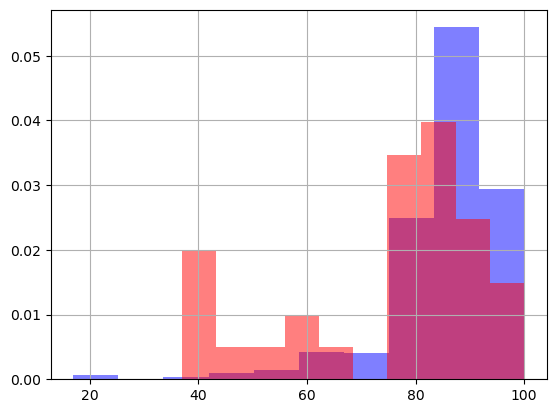

In [13]:
fig, ax = plt.subplots()

df.Amtiaz[df.IMDB_Link.notna()].hist(ax = ax, color = 'blue', alpha = 0.5, density= True)
df.Amtiaz[df.IMDB_Link.isna()].hist(ax = ax, color = 'red', density = True, alpha = 0.5)

# an apropriate K-S test might tell us to just ignore the difference 

#df.IMDB_Link.interpolate(method ='cubicspline' , inplace = True)

In [14]:
df = df[df.Country.notna()]
df = df[df.Total_Episodes.notna()]
df.IMDB_Link = df.IMDB_Link.interpolate(method ='cubicspline')

In [15]:
df.isna().sum()

URL                        0
Name                       0
IMDB_Link                  0
Amtiaz                     0
Number_People              0
Country                    0
Year                       0
Rade                       0
Num_Seasons                0
Total_Episodes             0
Publication                0
VoiceActors                0
Review                     0
Tips                       0
End                        0
Description                0
Characters                 0
InformativeMessages        0
PositiveAndNegative        0
SummaryStory               0
Screening                  0
Critics                    0
Conclusion                 0
Introduction               0
Total_Words                0
Num_Titles                 0
Is_Doblele                 0
Total_Target_Words         0
About_Words                0
Story_Words                0
Release_Date_Words         0
Review_Words               0
Final_Words                0
Informative_Words          0
Positive_Negat

In [17]:
df.to_csv('clean_data.csv')